In [8]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [9]:
print('Reading file...')
df = pd.read_excel("data.xlsx")
print('File read successfully\n\n')

Reading file...
File read successfully




In [10]:
voltage = np.array(df['V'])
current = np.array(df['I'])

In [ ]:
uV = 0.01 #Voltage
uA = 0.01 #Ampere

In [12]:
voltage_array = unumpy.uarray(voltage, uV)
current_array = unumpy.uarray(current, uA)

All Peaks (Maxima):
Voltage: 33.00, Current: 5.40
Voltage: 43.00, Current: 15.15
Voltage: 54.00, Current: 25.80
Voltage: 66.00, Current: 36.70
Voltage: 78.00, Current: 46.40
Voltage: 90.00, Current: 55.80

Voltage Differences Between Consecutive Peaks:
Difference 1: 10.00 V
Difference 2: 11.00 V
Difference 3: 12.00 V
Difference 4: 12.00 V
Difference 5: 12.00 V

Mean Voltage Difference: 11.40 V
Standard Deviation of Differences: 0.80 V


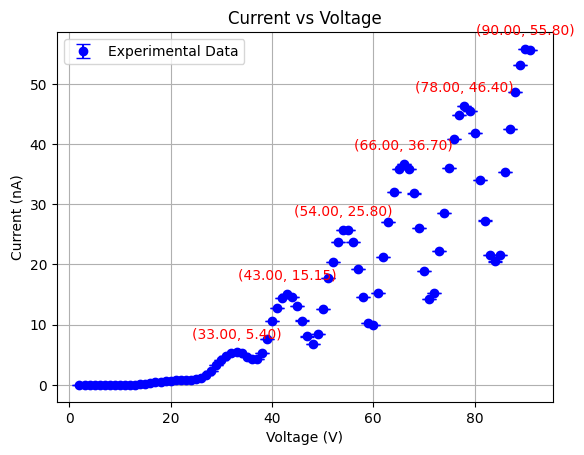

In [ ]:
# Extract nominal values and standard deviations
voltage_nominal = unumpy.nominal_values(voltage_array)
current_nominal = unumpy.nominal_values(current_array)
current_uncertainty = unumpy.std_devs(current_array)

# Find peaks (maxima and minima)
maxima_indices = find_peaks(current_nominal)[0]
minima_indices = find_peaks(-current_nominal)[0]

# Plot with error bars
plt.errorbar(
    voltage_nominal,
    current_nominal,
    yerr=current_uncertainty,
    fmt='o',
    color='blue',
    label="Experimental Data",
    capsize=5,
)

# Calculate differences between consecutive peaks
voltage_peaks = voltage_nominal[maxima_indices]
voltage_differences = np.diff(voltage_peaks)
mean_difference = np.mean(voltage_differences)
std_deviation = np.std(voltage_differences)

# Print all maxima and voltage differences
print("All Peaks (Maxima):")
for idx in maxima_indices:
    print(f"Voltage: {voltage_nominal[idx]:.2f}, Current: {current_nominal[idx]:.2f}")

print("\nVoltage Differences Between Consecutive Peaks:")
for i, diff in enumerate(voltage_differences):
    print(f"Difference {i+1}: {diff:.2f} V")

print(f"\nMean Voltage Difference: {mean_difference:.2f} V")
print(f"Standard Deviation of Differences: {std_deviation:.2f} V")

# Label maxima with (x, y) coordinates
for idx in maxima_indices:
    plt.annotate(
        f"({voltage_nominal[idx]:.2f}, {current_nominal[idx]:.2f})",  # Label as (x, y)
        (voltage_nominal[idx], current_nominal[idx]),
        textcoords="offset points",
        xytext=(0, 10),  # Offset text slightly above the point
        ha="center",
        color="red",
    )

plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")
plt.title("Current vs Voltage")
plt.legend()
plt.grid()
plt.show()
